#Manipulación y preparación de datos

**Tarea:**

Realizar tareas de manipulación y preparación de datos utilizando herramientas y bibliotecas específicas.

**Instrucciones:**

* Importar los conjuntos de datos con los que se trabajará.
* Realizar tareas de limpieza de datos, eliminando valores nulos o inconsistentes.
* Realizar transformaciones necesarias para preparar los datos para el análisis y modelado.


In [1]:
pip install ucimlrepo

In [2]:
# Loading the libraries
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA

In [3]:
warnings.filterwarnings("ignore")

##load_data

In [4]:
# Function to load dataset
def load_data(filepath):
  # data (as pandas dataframes)
  X = filepath.data.features
  y = filepath.data.targets
  # Merge them into a single DataFrame
  data = X.copy()
  data['Diabetes_binary'] = y
  return data, filepath


#Exploración y preprocesamiento de datos


**Tarea:**

Explorar y preprocesar los datos para identificar patrones, tendencias y relaciones significativas.

**Instrucciones:**

* Realizar análisis exploratorio de datos (EDA) utilizando visualizaciones y estadísticas descriptivas.
* Aplicar técnicas de preprocesamiento como normalización, codificación de variables categóricas y reducción de dimensionalidad.

##explore_data

In [5]:
# Function to explore the data
def explore_data(data, filepath):
  print(filepath.metadata)  ## considerar
  print(filepath.variables) ## considerar
  print(data.head())
  print(data.describe().T) ## considerar
  print(data.info()) ## considerar
  print(data.shape)
  print(data.isnull().sum())

  # Automatically find binary columns
  binary_columns = [col for col in data.columns if set(data[col].unique()).issubset({0, 1})]

  # Convert found binary columns to bool
  for col in binary_columns:
      data[col] = data[col].astype('bool')

  # List of categorical columns to convert
  categorical_columns = ['GenHlth', 'Age', 'Education', 'Income']

  # Convert specified columns to category
  for col in categorical_columns:
      data[col] = data[col].astype('category')

  # Check the data types
  print(data.dtypes)

##plot_graph


In [6]:
#Function to plot graphs
def plot_graph(data, target):
  # 1. Summary Statistics
  def summary_statistics(data):
      print("Summary Statistics:")
      print(data.describe(include='all'))

  # 2. Distribution of Numeric Variables
  def plot_numeric_distributions(data):
      numeric_columns = data.select_dtypes(include=['int64']).columns
      for col in numeric_columns:
          plt.figure(figsize=(10, 5))
          sns.histplot(data[col], bins=30, kde=True)
          plt.title(f'Distribution of {col}')
          plt.xlabel(col)
          plt.ylabel('Frequency')
          plt.grid()
          plt.show()

  # 3. Count Plots for Binary Variables against the Target
  def plot_binary_counts(data, target):
      binary_columns = data.select_dtypes(include=['bool']).columns
      for col in binary_columns:
          plt.figure(figsize=(10, 5))
          sns.countplot(x=data[col], hue=data[target])
          plt.title(f'Count of {col} by {target}')
          plt.xlabel(col)
          plt.ylabel('Count')
          plt.legend(title=target)
          plt.grid()
          plt.show()

  # 4. Box Plots for Continuous Variables by Target Variable
  def plot_boxplots(data, target):
      numeric_columns = data.select_dtypes(include=['int64']).columns
      for num_col in numeric_columns:
          plt.figure(figsize=(10, 5))
          sns.boxplot(x=data[target], y=data[num_col])
          plt.title(f'Boxplot of {num_col} by {target}')
          plt.xlabel(target)
          plt.ylabel(num_col)
          plt.grid()
          plt.show()

  # 5. Crosstabulation for Categorical Variables against the Target
  def plot_crosstab(data, target):
      categorical_columns = data.select_dtypes(include=['category']).columns
      for cat_col in categorical_columns:
          crosstab = pd.crosstab(data[cat_col], data[target])
          print(f'Crosstab for {cat_col} vs {target}:')
          print(crosstab)
          sns.heatmap(crosstab, annot=True, fmt="d", cmap='Blues')
          plt.title(f'Crosstab Heatmap of {cat_col} by {target}')
          plt.ylabel(cat_col)
          plt.xlabel(target)
          plt.show()

  # 6. Correlation Heatmap for Numeric Variables
  def plot_correlation_heatmap(data):
      correlation_matrix = data.corr()
      plt.figure(figsize=(15, 15))
      sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
      plt.title('Correlation Heatmap')
      plt.show()

    # Run EDA Functions
  summary_statistics(data)
  plot_numeric_distributions(data)
  plot_binary_counts(data, 'Diabetes_binary')
  plot_boxplots(data, 'Diabetes_binary')
  #plot_crosstab(data, 'Diabetes_binary')
  plot_correlation_heatmap(data)

##tranformation_type

In [7]:
# Function to identify the type of transformations
def transformation_type(data):
  # Create a temporal DataFrame  for the transformations
  temp_data = data.copy()

  # Create the transformations in the temporary DataFrame
  temp_data['Log_BMI'] = np.log(temp_data['BMI'] + 1)
  temp_data['Log_MentHlth'] = np.log(temp_data['MentHlth'] + 1)
  temp_data['Log_PhysHlth'] = np.log(temp_data['PhysHlth'] + 1)

  temp_data['Sqrt_BMI'] = np.sqrt(temp_data['BMI'] + 1)
  temp_data['Sqrt_MentHlth'] = np.sqrt(temp_data['MentHlth'] + 1)
  temp_data['Sqrt_PhysHlth'] = np.sqrt(temp_data['PhysHlth'] + 1)

  # Yeo-Johnson Transformation
  pt = PowerTransformer(method='yeo-johnson')
  temp_data[['YeoJohnson_BMI', 'YeoJohnson_MentHlth', 'YeoJohnson_PhysHlth']] = pt.fit_transform(temp_data[['BMI', 'MentHlth', 'PhysHlth']])

  # Configure the figure for multiple subgraphs
  fig, axes = plt.subplots(5, 3, figsize=(15, 20))
  fig.suptitle('Comparison of Distributions of Numerical Variables and Transforms', fontsize=16)

  # Originals
  for i, col in enumerate(['BMI', 'MentHlth', 'PhysHlth']):
      sns.histplot(data[col], bins=30, kde=True, ax=axes[0, i])
      axes[0, i].set_title(f'Distribución de {col}')
      axes[0, i].set_xlabel(col)
      axes[0, i].set_ylabel('Frecuencia')

  # Logarithmic Transformation
  for i, col in enumerate(['Log_BMI', 'Log_MentHlth', 'Log_PhysHlth']):
      sns.histplot(temp_data[col], bins=30, kde=True, ax=axes[1, i])
      axes[1, i].set_title(f'Distribución Log de {col}')
      axes[1, i].set_xlabel(col)
      axes[1, i].set_ylabel('Frecuencia')

  # Square Root Transformation
  for i, col in enumerate(['Sqrt_BMI', 'Sqrt_MentHlth', 'Sqrt_PhysHlth']):
      sns.histplot(temp_data[col], bins=30, kde=True, ax=axes[2, i])
      axes[2, i].set_title(f'Distribución Raíz Cuadrada de {col}')
      axes[2, i].set_xlabel(col)
      axes[2, i].set_ylabel('Frecuencia')

  # Yeo-Johnson Transformation
  for i, col in enumerate(['YeoJohnson_BMI', 'YeoJohnson_MentHlth', 'YeoJohnson_PhysHlth']):
      sns.histplot(temp_data[col], bins=30, kde=True, ax=axes[3, i])
      axes[3, i].set_title(f'Distribución Yeo-Johnson de {col}')
      axes[3, i].set_xlabel(col)
      axes[3, i].set_ylabel('Frecuencia')

  # Occupying the space in the last row (you can adjust or add more graphs)
  for ax in axes[4]:
      ax.axis('off')  #Or you can add other graphs here

  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  #  Adjust design
  plt.show()

##transformation

In [8]:
#Function to apply transformation
def transformation(data):

  # 1. Codification
  def codification(data):
    # Inicializa el codificador
    label_encoder = LabelEncoder()

    # Aplica el Label Encoding a las columnas ordinales
    data['GenHlth'] = label_encoder.fit_transform(data['GenHlth'])
    data['Age'] = label_encoder.fit_transform(data['Age'])
    data['Education'] = label_encoder.fit_transform(data['Education'])
    data['Income'] = label_encoder.fit_transform(data['Income'])

    # Muestra el DataFrame transformado
    print(data[['GenHlth', 'Age', 'Education','Income']])
    return data

  # 2. Transformation
  def transform(data):
    # Aplicar Yeo-Johnson y reemplazar las columnas originales
    pt = PowerTransformer(method='yeo-johnson')
    data[['BMI', 'MentHlth', 'PhysHlth']] = pt.fit_transform(data[['BMI', 'MentHlth', 'PhysHlth']])

    # Estandarizar las variables transformadas y reemplazar las columnas originales
    scaler = StandardScaler()
    data[['BMI', 'MentHlth', 'PhysHlth']] = scaler.fit_transform(data[['BMI', 'MentHlth', 'PhysHlth']])

    # Mostrar el DataFrame transformado y estandarizado
    print(data[['BMI', 'MentHlth', 'PhysHlth']])
    return data

  return data


  # Run transformation Functions
  codification(data)
  transform(data)


##PCA

In [9]:
#Function to apply PCA
def apply_PCA(data):

  # Seleccionar características para PCA (variables ya transformadas y escaladas)
  X = data[['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income']]

  # Inicializa PCA y ajusta el modelo
  pca = PCA()
  pca.fit(X)

  # Variancia explicada por cada componente
  explained_variance = pca.explained_variance_ratio_

  # Crea un gráfico de codo
  plt.figure(figsize=(10, 6))
  plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
  plt.title('Varianza Explicada por Componentes Principales')
  plt.xlabel('Número de Componentes Principales')
  plt.ylabel('Proporción de Varianza Explicada')
  plt.grid()
  plt.show()

  # Crea un gráfico de varianza acumulada
  plt.figure(figsize=(10, 6))
  cumulative_variance = explained_variance.cumsum()
  plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
  plt.title('Varianza Acumulada por Componentes Principales')
  plt.xlabel('Número de Componentes Principales')
  plt.ylabel('Varianza Acumulada')
  plt.grid()
  plt.axhline(y=0.92, color='r', linestyle='--')  # Umbral del 92%
  plt.show()

  # Seleccionar características para PCA (variables ya transformadas y escaladas)
  X = data[['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income']]

  # Aplicar PCA
  pca = PCA(n_components=5)  # Elegir cuántas componentes principales mantener
  X_pca = pca.fit_transform(X)

  # Convertir el resultado a un DataFrame
  pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(5)])

  # Unir las componentes principales con el DataFrame original, excluyendo las variables originales
  final_df = pd.concat([data.drop(columns=['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income']).reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

  # Mostrar el DataFrame final
  print(final_df.head())
  return final_df

##MAIN FUNCTION


In [10]:
# Main function for running the pipeline
def main(cdc_diabetes_health_indicators):
  data, filepath = load_data(cdc_diabetes_health_indicators) # Function to load dataset
  explore_data(data, filepath) # Function to explore the data
  plot_graph(data, 'Diabetes_binary') #Function to plot graphs
  transformation_type(data) # Function to identify the type of transformations
  data = transformation(data) #Function to apply transformation
  final_df = apply_PCA(data)#Function to apply PCA


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

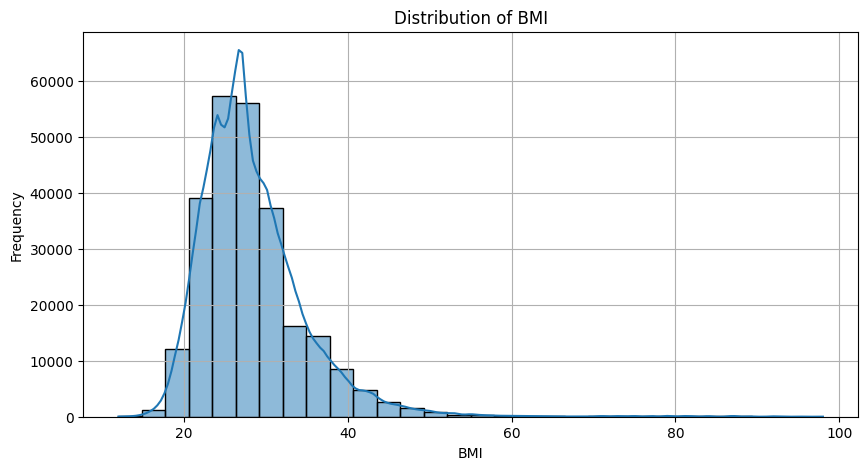

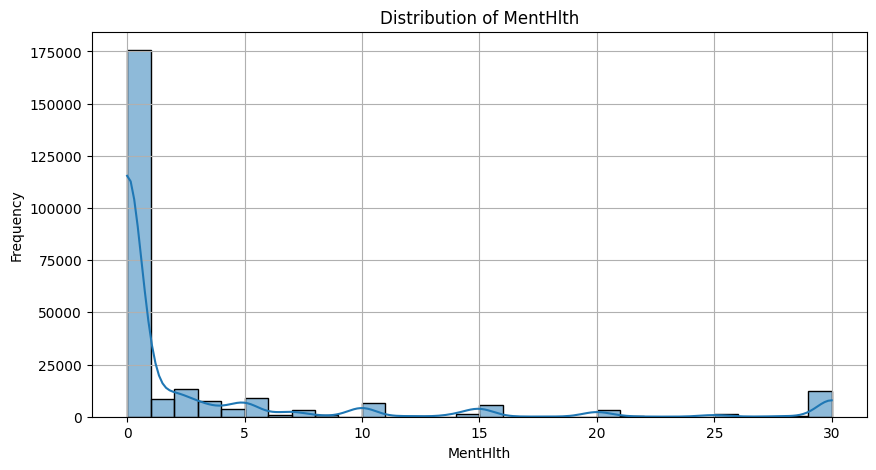

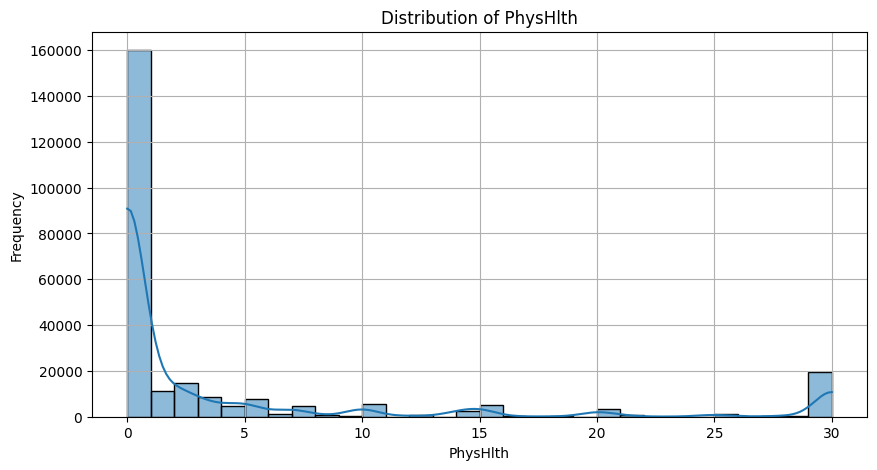

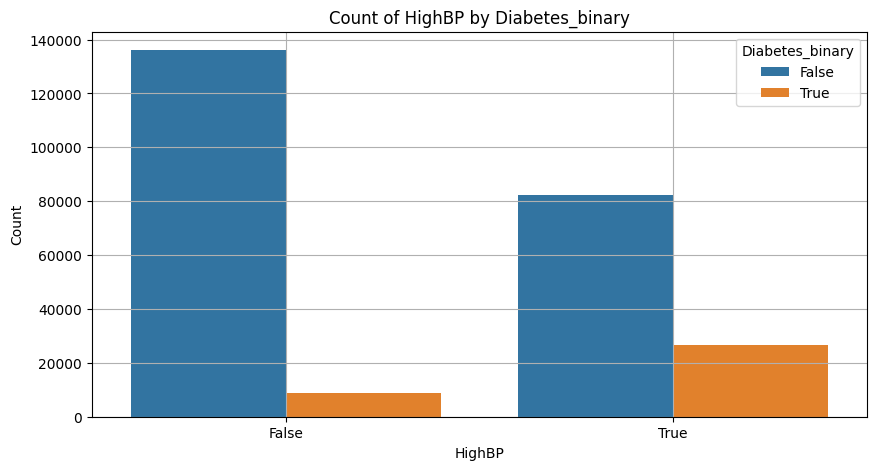

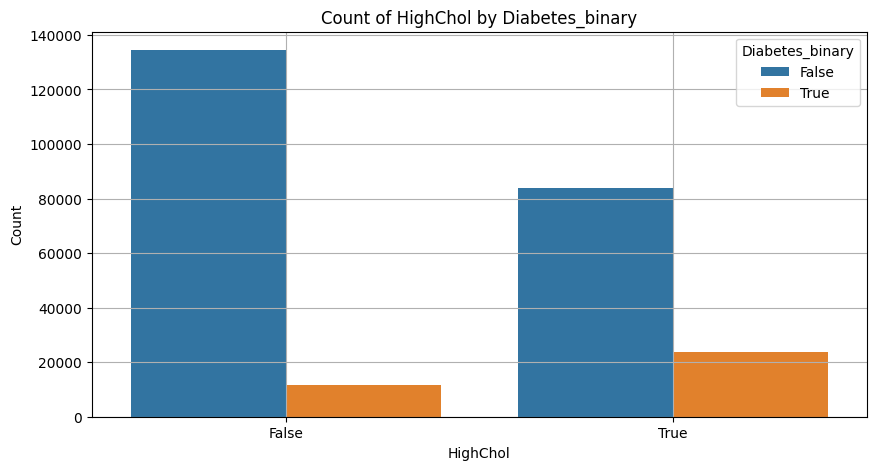

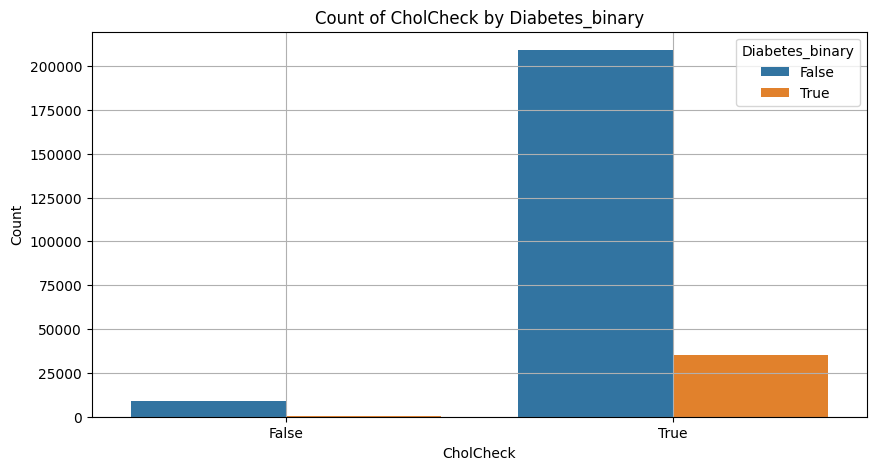

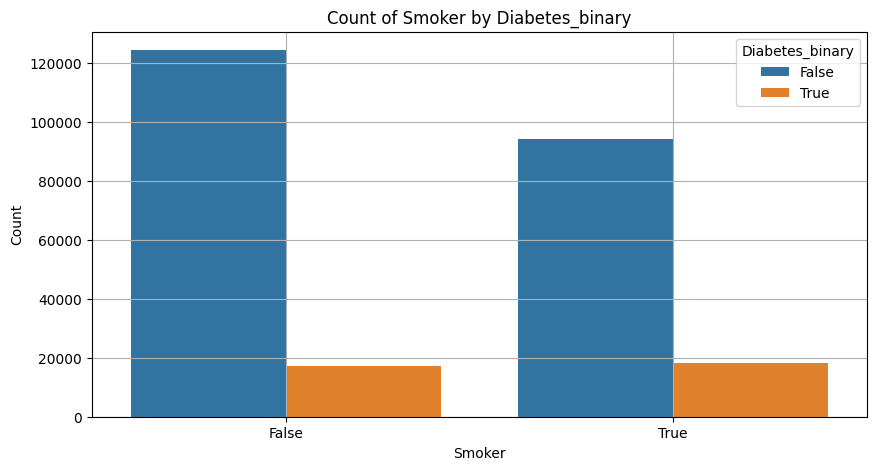

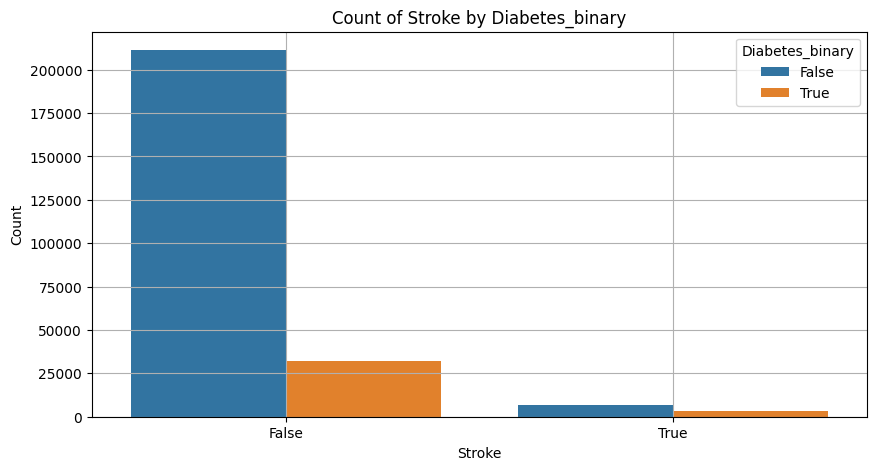

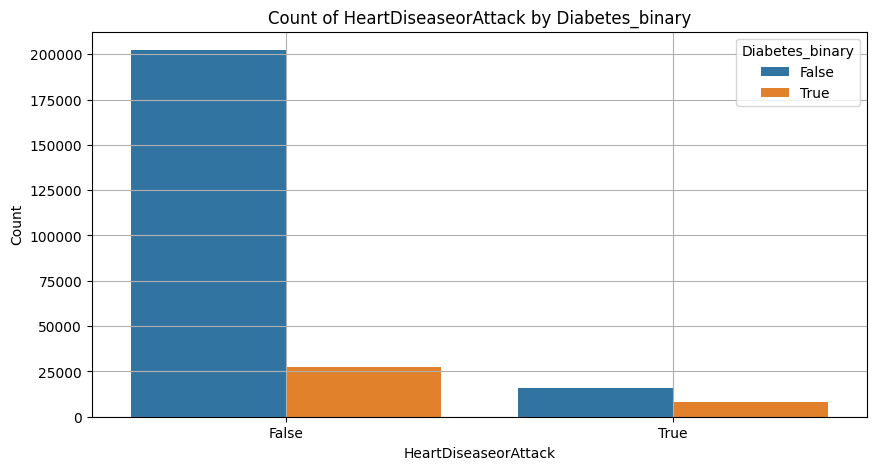

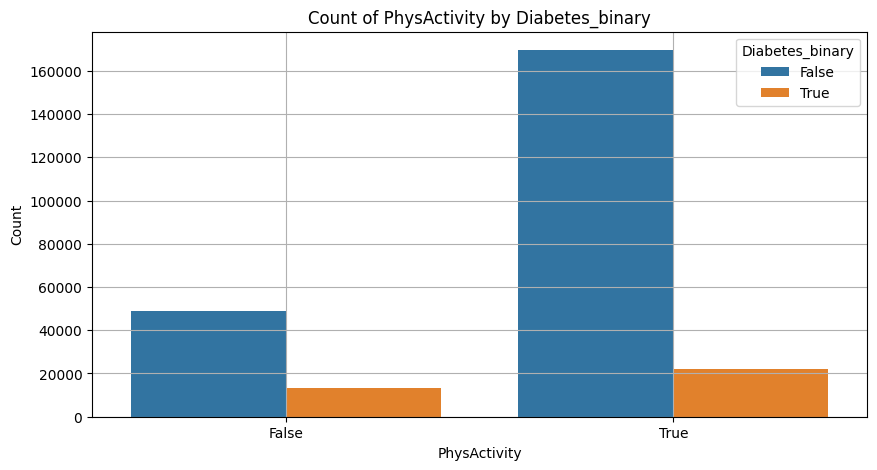

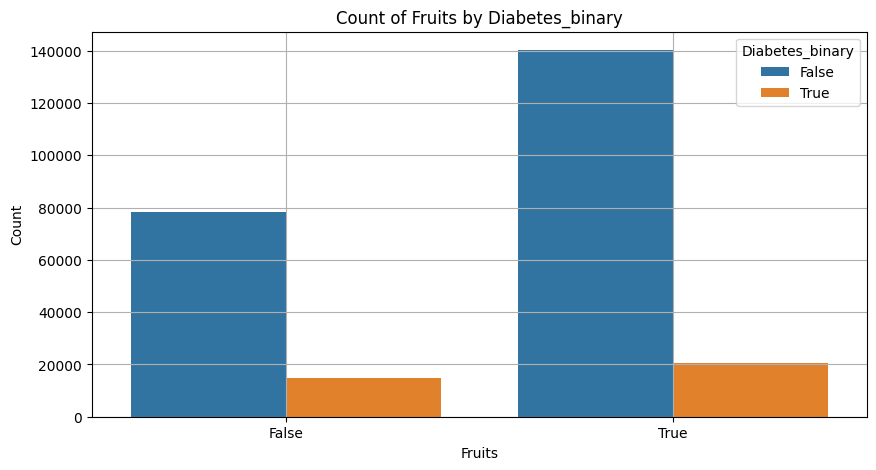

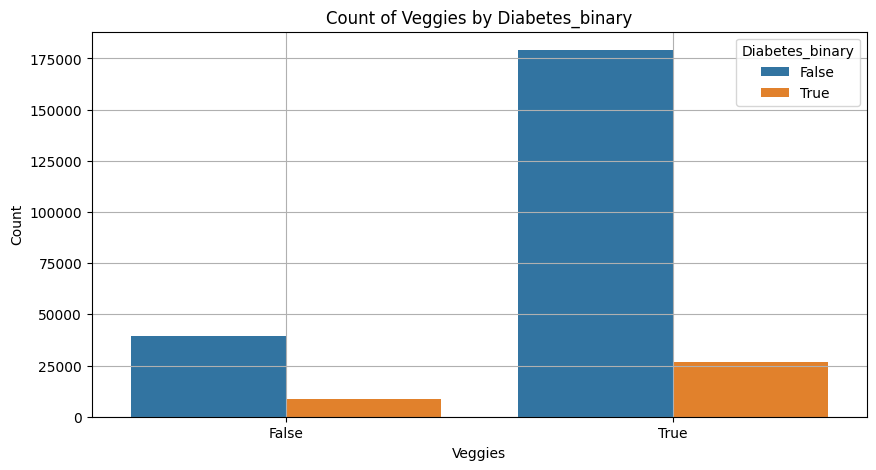

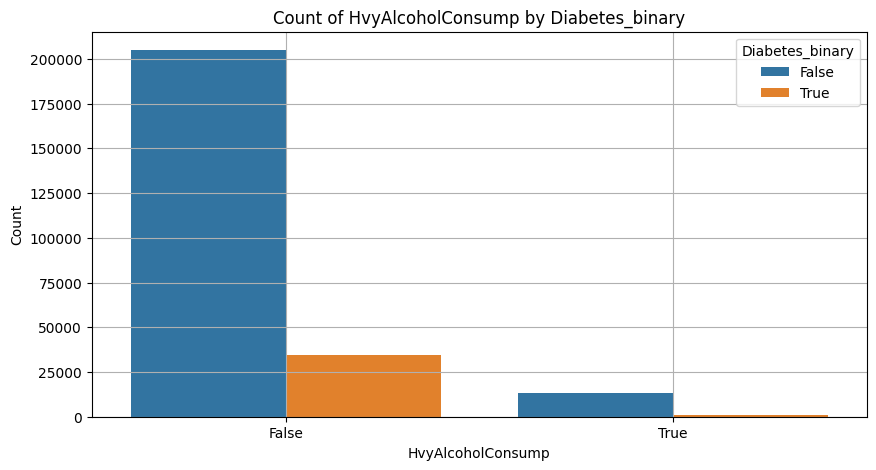

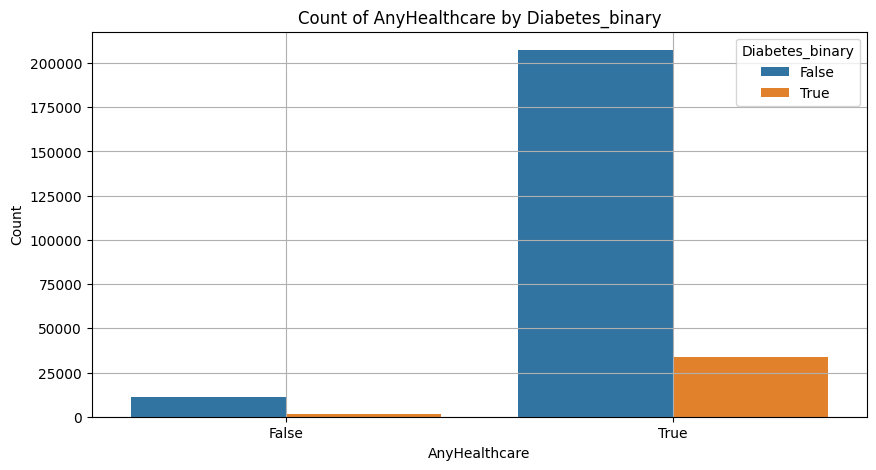

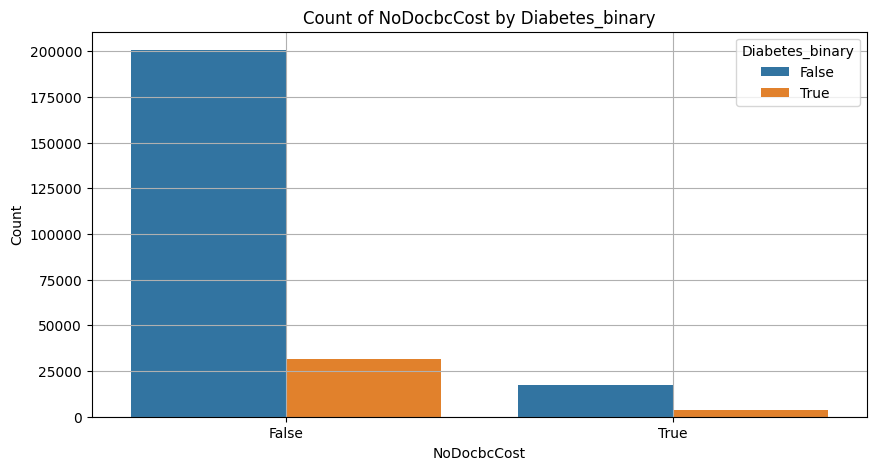

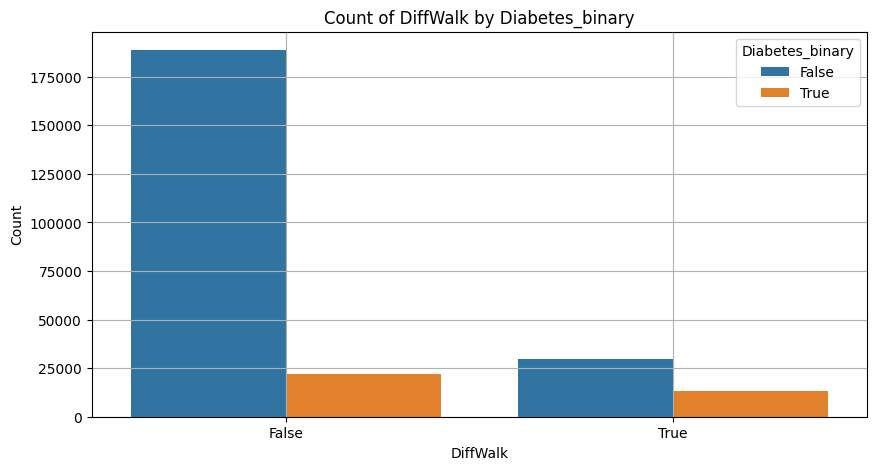

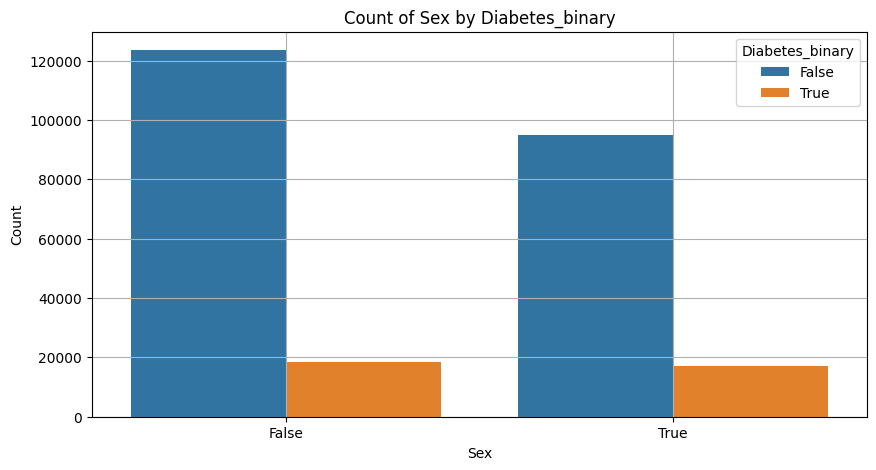

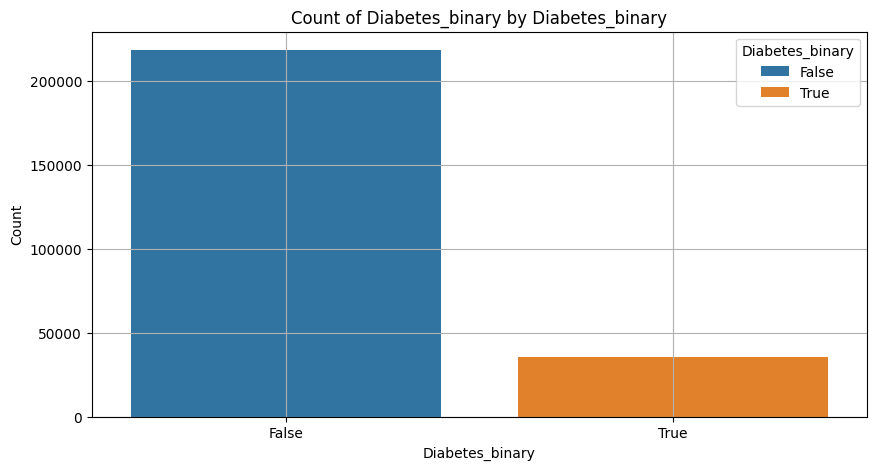

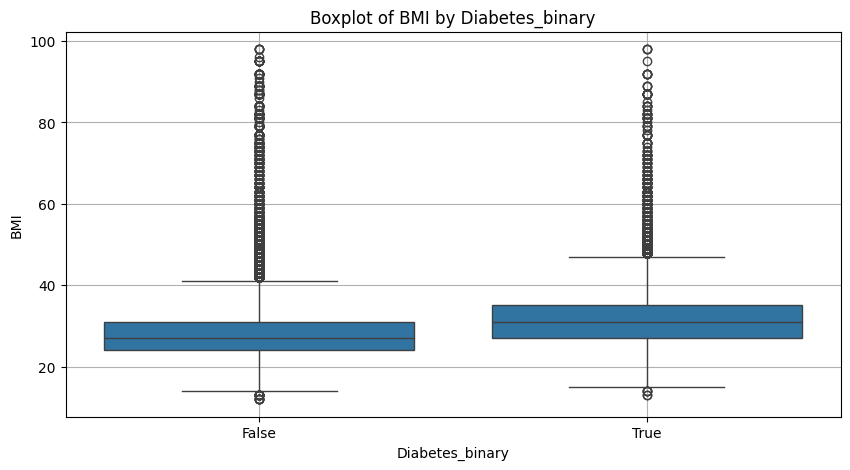

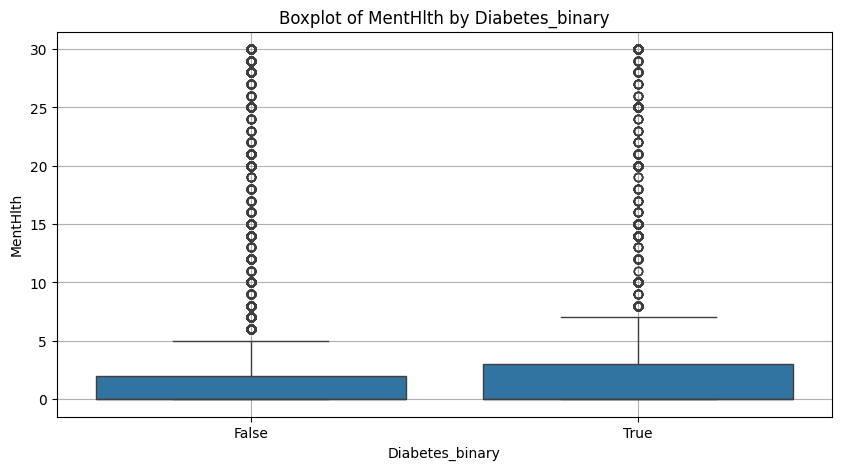

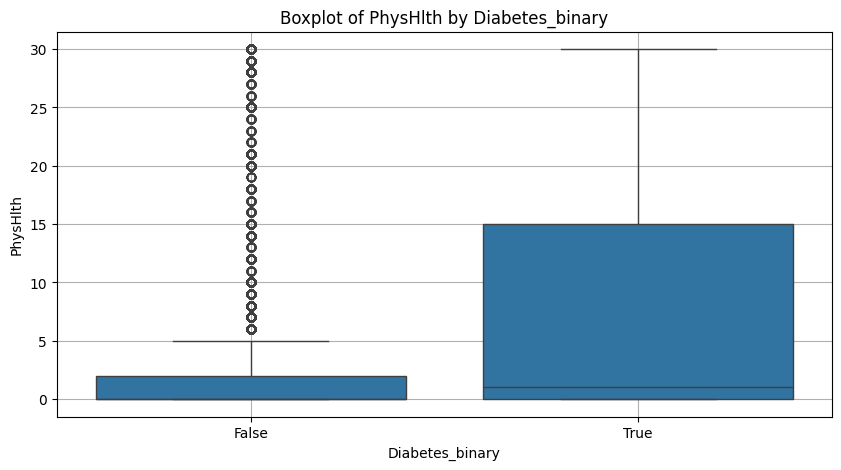

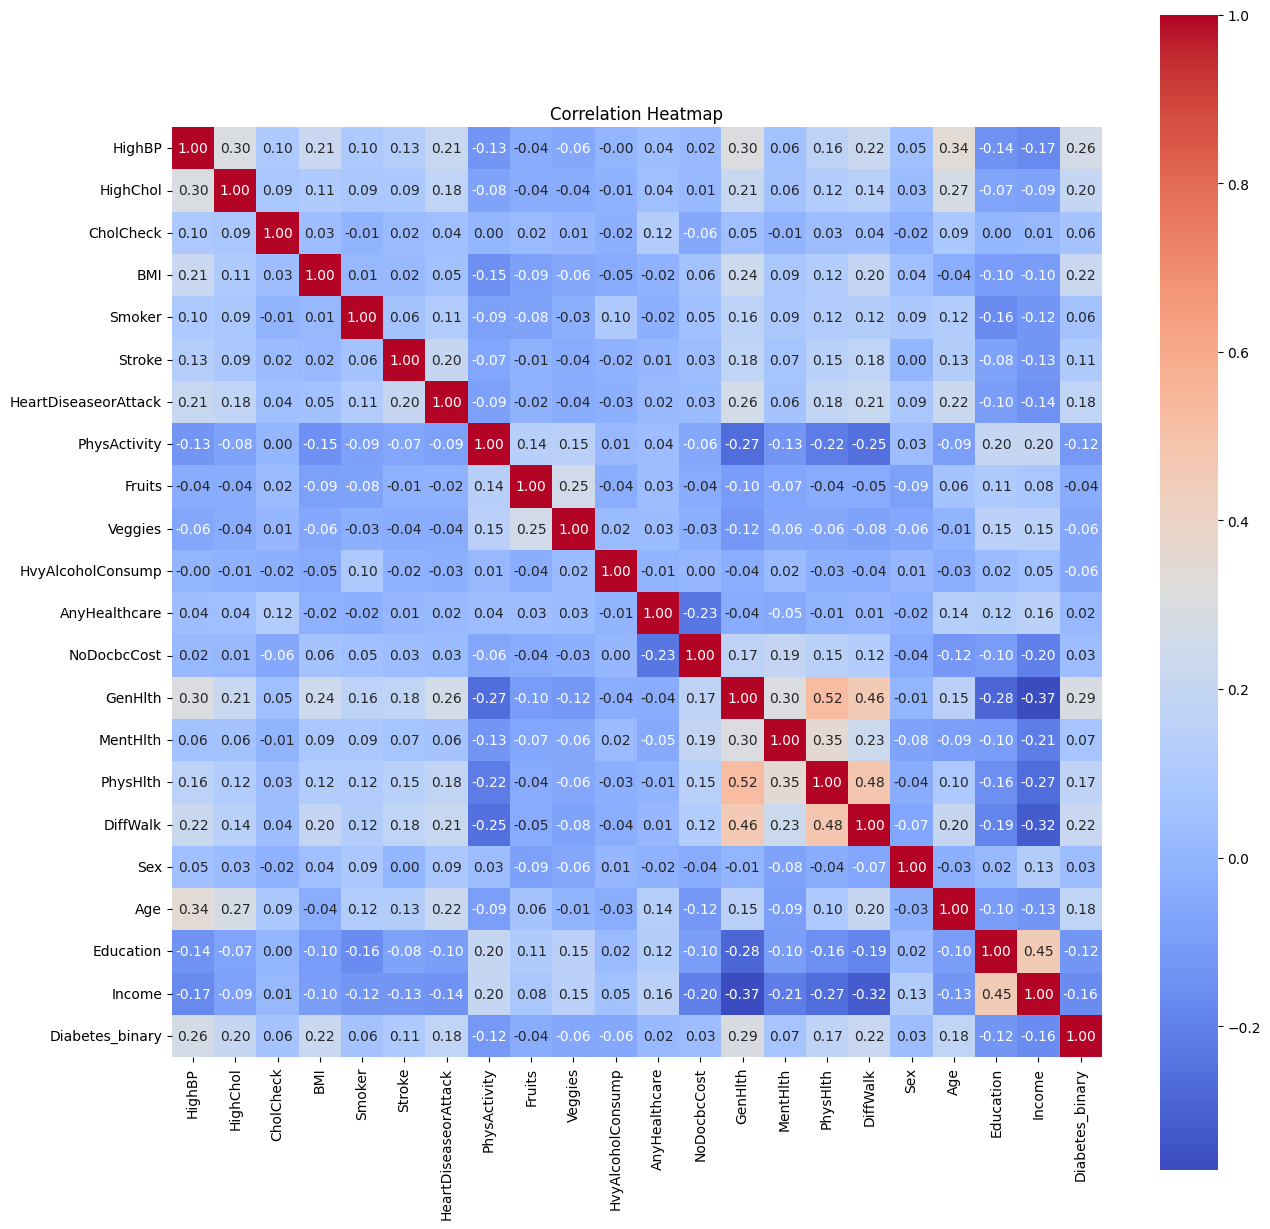

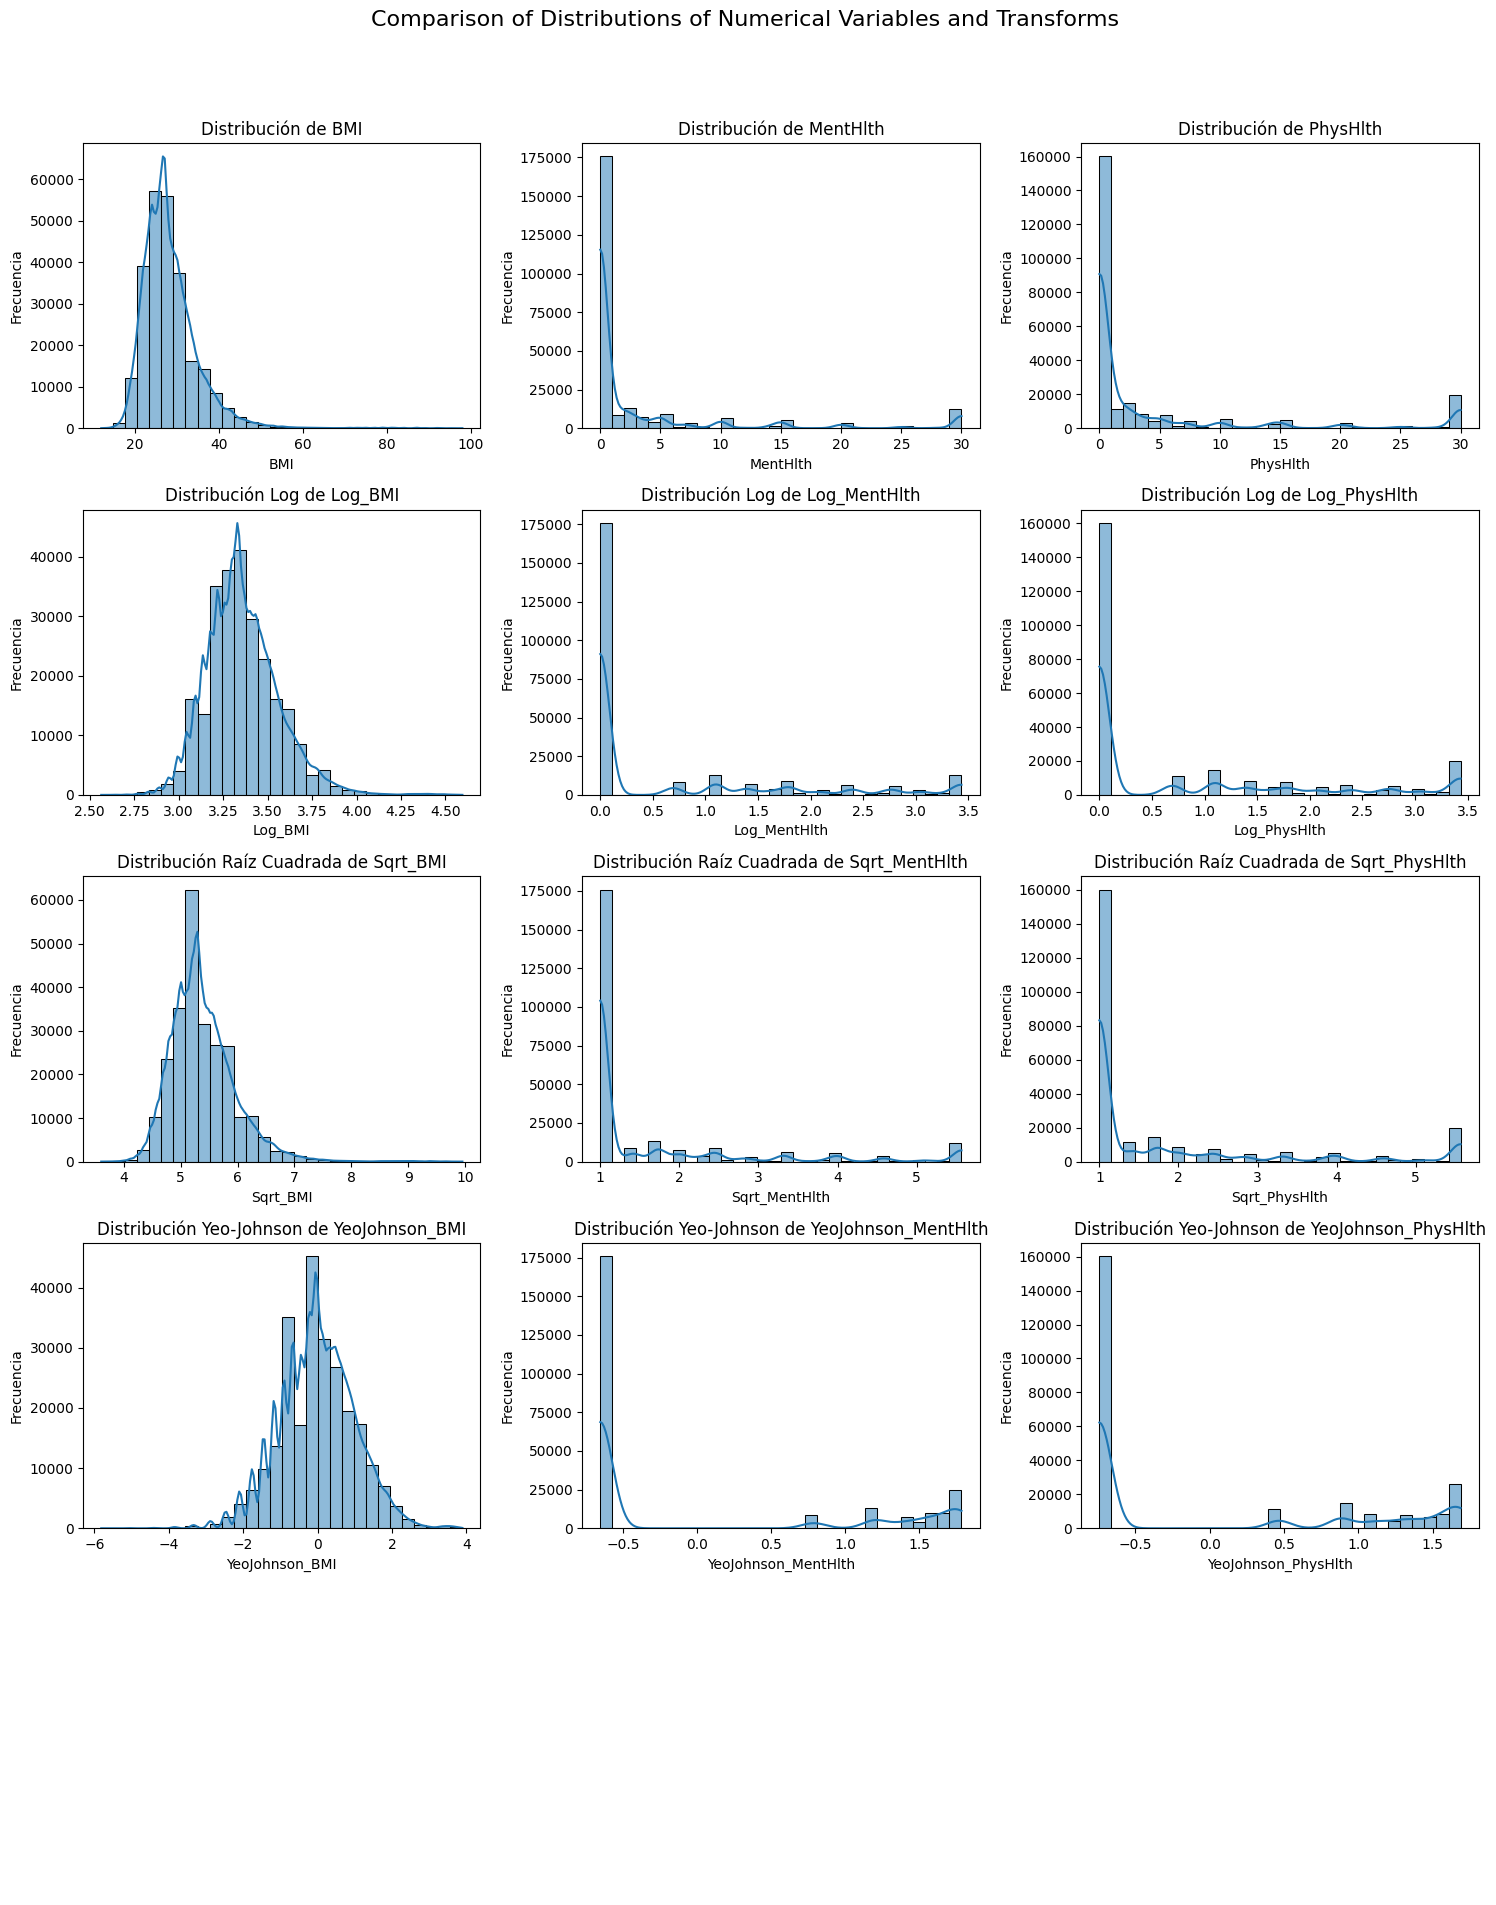

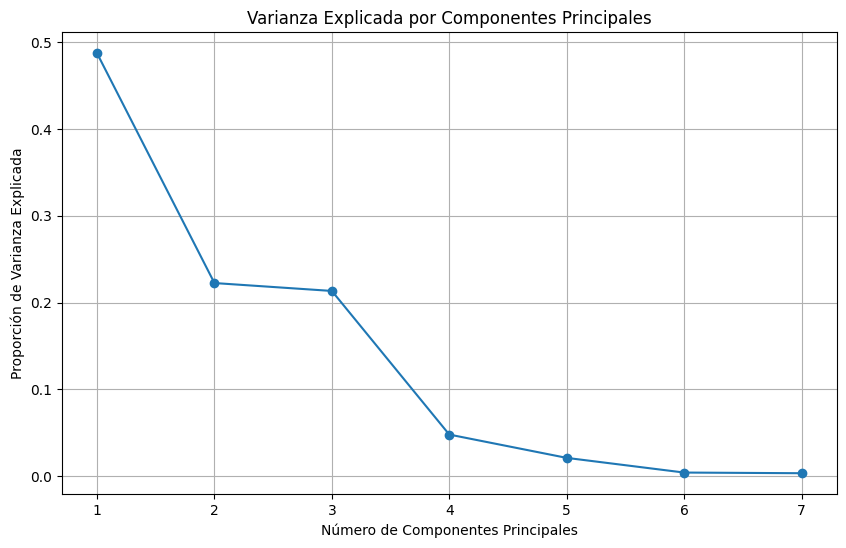

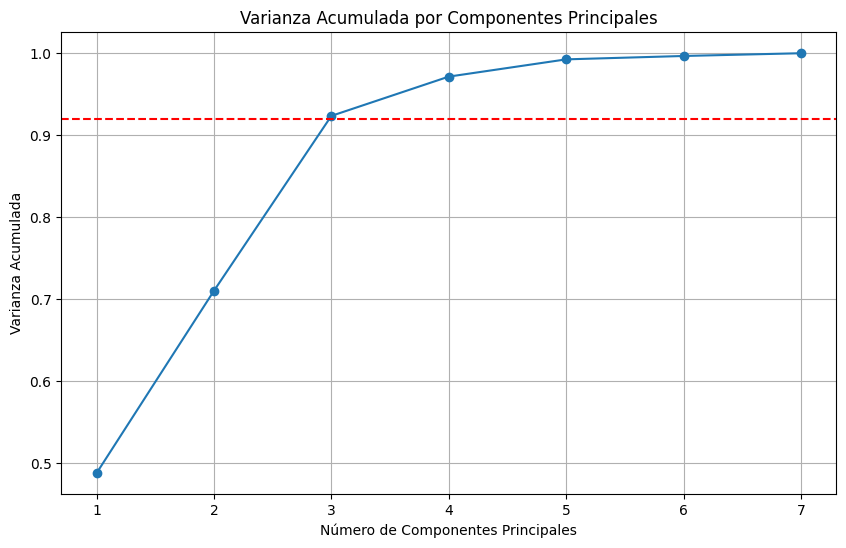

   HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0    True      True       True    True   False                 False   
1   False     False      False    True   False                 False   
2    True      True       True   False   False                 False   
3    True     False       True   False   False                 False   
4    True      True       True   False   False                 False   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0         False   False     True              False           True   
1          True   False    False              False          False   
2         False    True    False              False           True   
3          True    True     True              False           True   
4          True    True     True              False           True   

   NoDocbcCost  DiffWalk    Sex  Diabetes_binary        PC1       PC2  \
0        False      True  False            False  19.046237  7.957808   


In [11]:
# Se manda llamar la funcion main
main(cdc_diabetes_health_indicators = fetch_ucirepo(id=891))